In [124]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier



In [3]:
path = "/Users/michalmacbookpro/Downloads/titanic"
df_train = pd.read_csv(path + "/train.csv")
df_test = pd.read_csv(path + "/test.csv")

In [4]:
combine = [df_train, df_test]

In [5]:
df_test1 = df_test.copy()
df_test1["Survived"] = np.nan

In [6]:
df_test1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived       418
dtype: int64

In [7]:
np.mean(df_test1["Age"])

30.272590361445783

In [8]:
df_test1["Age"].describe()


count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

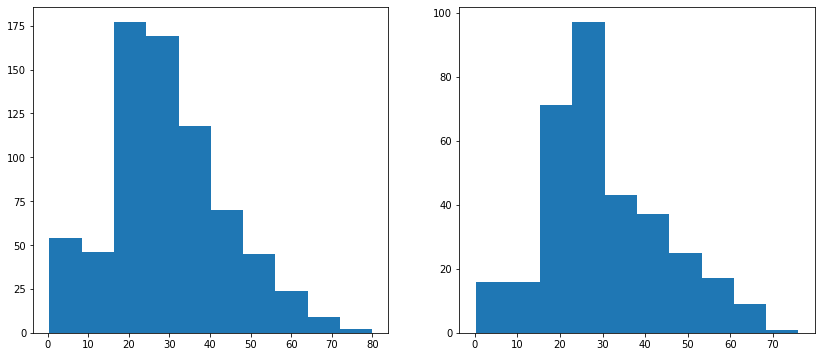

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df_train["Age"])
plt.subplot(1,2,2)
plt.hist(df_test1["Age"])


In [10]:
df_test1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [11]:
data = pd.concat([df_train,df_test]).reset_index(drop=True)

In [12]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
data[["Woman","Man"]] = pd.get_dummies(data["Sex"])
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Woman,Man
855,856,1.0,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1,0
199,200,0.0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S,1,0
862,863,1.0,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,1,0
1024,1025,NaN,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C,0,1
552,553,0.0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q,0,1


<AxesSubplot:xlabel='Embarked', ylabel='Count'>

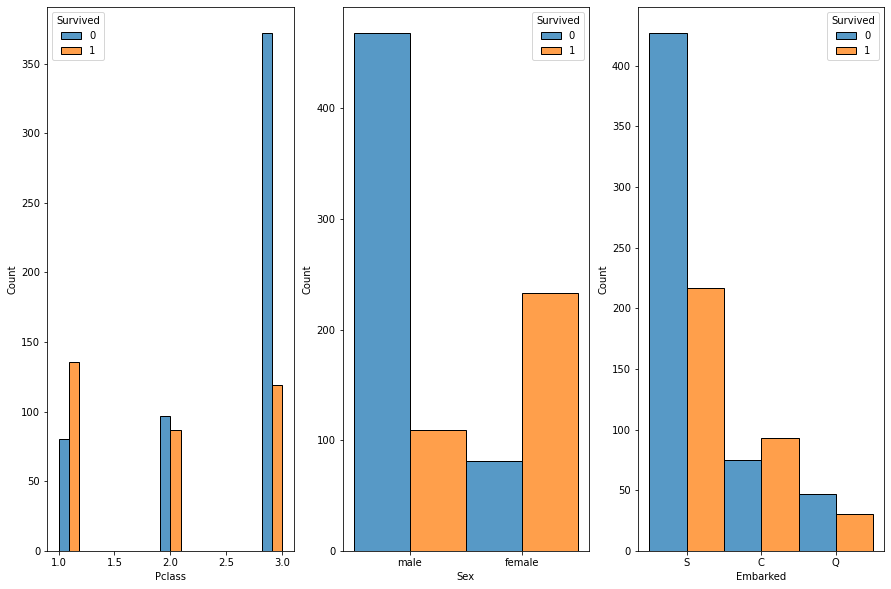

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.histplot(data=df_train,x=df_train["Pclass"],hue=df_train["Survived"],multiple="dodge")
plt.subplot(1,3,2)
sns.histplot(data=df_train,x=df_train["Sex"],hue=df_train["Survived"],multiple="dodge")
plt.subplot(1,3,3)
sns.histplot(data=df_train,x=df_train["Embarked"],hue=df_train["Survived"],multiple="dodge")

In [15]:
data[["Pclass_1","Pclass_2","Pclass_3"]] = pd.get_dummies(data["Pclass"])
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Woman,Man,Pclass_1,Pclass_2,Pclass_3
1141,1142,NaN,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S,1,0,0,1,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.00,0,0,36928,164.8667,C7,S,1,0,1,0,0
1285,1286,NaN,3,"Kink-Heilmann, Mr. Anton",male,29.00,3,1,315153,22.0250,NaN,S,0,1,0,0,1
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1
528,529,0.0,3,"Salonen, Mr. Johan Werner",male,39.00,0,0,3101296,7.9250,NaN,S,0,1,0,0,1
838,839,1.0,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S,0,1,0,0,1
330,331,1.0,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q,1,0,0,0,1
800,801,0.0,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S,0,1,0,1,0
696,697,0.0,3,"Kelly, Mr. James",male,44.00,0,0,363592,8.0500,NaN,S,0,1,0,0,1
891,892,NaN,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q,0,1,0,0,1


In [16]:
data[["C","Q","S"]] = pd.get_dummies(data["Embarked"])

In [17]:
data["Title"] = data["Name"].str.extract(r"([A-Za-z]+\.)")
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Woman,Man,Pclass_1,Pclass_2,Pclass_3,C,Q,S,Title
644,645,1.0,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,...,C,1,0,0,0,1,1,0,0,Miss.
1179,1180,NaN,3,"Mardirosian, Mr. Sarkis",male,NaN,0,0,2655,7.2292,...,C,0,1,0,0,1,1,0,0,Mr.
376,377,1.0,3,"Landergren, Miss. Aurora Adelia",female,22.00,0,0,C 7077,7.2500,...,S,1,0,0,0,1,0,0,1,Miss.
570,571,1.0,2,"Harris, Mr. George",male,62.00,0,0,S.W./PP 752,10.5000,...,S,0,1,0,1,0,0,0,1,Mr.
1252,1253,NaN,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.00,1,1,S.C./PARIS 2079,37.0042,...,C,1,0,0,1,0,1,0,0,Mrs.
786,787,1.0,3,"Sjoblom, Miss. Anna Sofia",female,18.00,0,0,3101265,7.4958,...,S,1,0,0,0,1,0,0,1,Miss.
148,149,0.0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,...,S,0,1,0,1,0,0,0,1,Mr.
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,...,S,0,1,0,0,1,0,0,1,Mr.
548,549,0.0,3,"Goldsmith, Mr. Frank John",male,33.00,1,1,363291,20.5250,...,S,0,1,0,0,1,0,0,1,Mr.
661,662,0.0,3,"Badt, Mr. Mohamed",male,40.00,0,0,2623,7.2250,...,C,0,1,0,0,1,1,0,0,Mr.


In [18]:
data["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.', 'Dona.'], dtype=object)

In [19]:
data["Title"].replace(['Capt.', 'Col.', 'Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.', 'Lady.','Major.', 'Rev.', 'Sir.'], 'Rare.', inplace = True)
data["Title"].replace(['Mlle.', 'Ms.'], 'Miss.', inplace = True)
data["Title"].replace(['Mme.'], 'Mrs.', inplace = True)

In [20]:
data["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rare.'], dtype=object)

In [21]:
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Master.,0,61
Miss.,264,0
Mr.,0,757
Mrs.,198,0
Rare.,4,25


In [22]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Woman,Man,Pclass_1,Pclass_2,Pclass_3,C,Q,S,Title
1099,1100,NaN,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,...,C,1,0,1,0,0,1,0,0,Miss.
949,950,NaN,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,...,S,0,1,0,0,1,0,0,1,Mr.
1006,1007,NaN,3,"Chronopoulos, Mr. Demetrios",male,18.0,1,0,2680,14.4542,...,C,0,1,0,0,1,1,0,0,Mr.
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,...,Q,1,0,0,0,1,0,1,0,Miss.
1074,1075,NaN,3,"Lane, Mr. Patrick",male,NaN,0,0,7935,7.7500,...,Q,0,1,0,0,1,0,1,0,Mr.
768,769,0.0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,...,Q,0,1,0,0,1,0,1,0,Mr.
449,450,1.0,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,...,S,0,1,1,0,0,0,0,1,Rare.
824,825,0.0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,...,S,0,1,0,0,1,0,0,1,Master.
1097,1098,NaN,3,"McGowan, Miss. Katherine",female,35.0,0,0,9232,7.7500,...,Q,1,0,0,0,1,0,1,0,Miss.
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,...,S,0,1,0,0,1,0,0,1,Mr.


In [23]:
data["Cabin_L"] = data["Cabin"].str.extract(r"(^\D{0,1})")
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Woman,Man,Pclass_1,Pclass_2,Pclass_3,C,Q,S,Title,Cabin_L
991,992,NaN,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,...,1,0,1,0,0,1,0,0,Mrs.,C
403,404,0.0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,...,0,1,0,0,1,0,0,1,Mr.,NaN
962,963,NaN,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,...,0,1,0,0,1,0,0,1,Mr.,NaN
58,59,1.0,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,...,1,0,0,1,0,0,0,1,Miss.,NaN
402,403,0.0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,...,1,0,0,0,1,0,0,1,Miss.,NaN
1081,1082,NaN,2,"Angle, Mr. William A",male,34.0,1,0,226875,26.0000,...,0,1,0,1,0,0,0,1,Mr.,NaN
1288,1289,NaN,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,...,1,0,1,0,0,1,0,0,Mrs.,B
366,367,1.0,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,...,1,0,1,0,0,1,0,0,Mrs.,D
1182,1183,NaN,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30.0,0,0,382650,6.9500,...,1,0,0,0,1,0,1,0,Miss.,NaN
620,621,0.0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,...,0,1,0,0,1,1,0,0,Mr.,NaN


In [24]:
data["Cabin_L"].fillna("U",inplace=True)

In [25]:
data["Cabin_L"].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_L, dtype: int64

<AxesSubplot:xlabel='Cabin_L', ylabel='Count'>

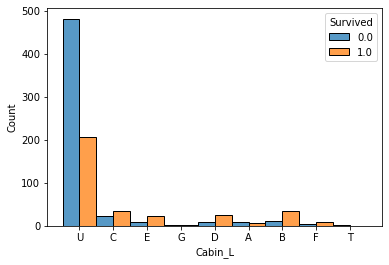

In [26]:
sns.histplot(data=data[:len(df_train)],x=data[:len(df_train)]["Cabin_L"],hue="Survived",multiple="dodge")

In [27]:
data["Cabin_L"] = data["Cabin_L"].map({"A":"ABC","B":"ABC","C":"ABC","D":"DE","E":"DE","F":"FG","G":"FG","T":"ABC","U":"U"})
data["Cabin_L"].value_counts()

U      1014
ABC     182
DE       87
FG       26
Name: Cabin_L, dtype: int64

<AxesSubplot:xlabel='Cabin_L', ylabel='Count'>

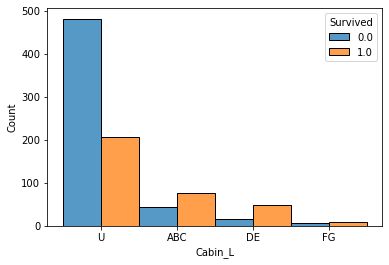

In [28]:
sns.histplot(data=data[:len(df_train)],x=data[:len(df_train)]["Cabin_L"],hue="Survived",multiple="dodge")

In [29]:
data["Age"].fillna(np.mean(data["Age"]),inplace=True)

In [30]:
data.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Woman,Man,Pclass_1,Pclass_2,Pclass_3,C,Q,S,Title,Cabin_L
872,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.000000,0,0,695,5.0000,...,0,1,1,0,0,0,0,1,Mr.,ABC
1308,1309,NaN,3,"Peter, Master. Michael J",male,29.881138,1,1,2668,22.3583,...,0,1,0,0,1,1,0,0,Master.,U
1037,1038,NaN,1,"Hilliard, Mr. Herbert Henry",male,29.881138,0,0,17463,51.8625,...,0,1,1,0,0,0,0,1,Mr.,DE
53,54,1.0,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.000000,1,0,2926,26.0000,...,1,0,0,1,0,0,0,1,Mrs.,U
437,438,1.0,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.000000,2,3,29106,18.7500,...,1,0,0,1,0,0,0,1,Mrs.,U
454,455,0.0,3,"Peduzzi, Mr. Joseph",male,29.881138,0,0,A/5 2817,8.0500,...,0,1,0,0,1,0,0,1,Mr.,U
136,137,1.0,1,"Newsom, Miss. Helen Monypeny",female,19.000000,0,2,11752,26.2833,...,1,0,1,0,0,0,0,1,Miss.,DE
807,808,0.0,3,"Pettersson, Miss. Ellen Natalia",female,18.000000,0,0,347087,7.7750,...,1,0,0,0,1,0,0,1,Miss.,U
706,707,1.0,2,"Kelly, Mrs. Florence ""Fannie""",female,45.000000,0,0,223596,13.5000,...,1,0,0,1,0,0,0,1,Mrs.,U
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,...,0,1,0,0,1,0,0,1,Mr.,U


In [31]:
data["Age_Q"] = pd.qcut(data["Age"],5,labels=False)

In [32]:
data.iloc[:15,6:]

,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Woman,Man,Pclass_1,Pclass_2,Pclass_3,C,Q,S,Title,Cabin_L,Age_Q
0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1,Mr.,U,1
1,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0,Mrs.,ABC,3
2,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1,Miss.,U,1
3,1,0,113803,53.1000,C123,S,1,0,1,0,0,0,0,1,Mrs.,ABC,3
4,0,0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1,Mr.,U,3
5,0,0,330877,8.4583,NaN,Q,0,1,0,0,1,0,1,0,Mr.,U,2
6,0,0,17463,51.8625,E46,S,0,1,1,0,0,0,0,1,Mr.,DE,4
7,3,1,349909,21.0750,NaN,S,0,1,0,0,1,0,0,1,Master.,U,0
8,0,2,347742,11.1333,NaN,S,1,0,0,0,1,0,0,1,Mrs.,U,1
9,1,0,237736,30.0708,NaN,C,1,0,0,1,0,1,0,0,Mrs.,U,0


In [33]:
data.groupby(["Age_Q"]).mean()["Survived"]

Age_Q
0    0.426471
1    0.386076
2    0.301508
3    0.437126
4    0.374233
Name: Survived, dtype: float64

In [53]:
data[['Miss.', 'Mr.', 'Mrs.', 'Rare.']] = pd.get_dummies(data["Title"],drop_first=True)
data.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,Title,Cabin_L,Age_Q,Miss.,Mr.,Mrs.,Rare.
744,745,1.0,3,"Stranden, Mr. Juho",male,31.000000,0,0,STON/O 2. 3101288,7.9250,...,0,0,1,Mr.,U,3,0,1,0,0
914,915,NaN,1,"Williams, Mr. Richard Norris II",male,21.000000,0,1,PC 17597,61.3792,...,1,0,0,Mr.,U,0,0,1,0,0
818,819,0.0,3,"Holm, Mr. John Fredrik Alexander",male,43.000000,0,0,C 7075,6.4500,...,0,0,1,Mr.,U,4,0,1,0,0
974,975,NaN,3,"Demetri, Mr. Marinko",male,29.881138,0,0,349238,7.8958,...,0,0,1,Mr.,U,2,0,1,0,0
469,470,1.0,3,"Baclini, Miss. Helene Barbara",female,0.750000,2,1,2666,19.2583,...,1,0,0,Miss.,U,0,1,0,0,0
350,351,0.0,3,"Odahl, Mr. Nils Martin",male,23.000000,0,0,7267,9.2250,...,0,0,1,Mr.,U,1,0,1,0,0
1164,1165,NaN,3,"Lennon, Miss. Mary",female,29.881138,1,0,370371,15.5000,...,0,1,0,Miss.,U,2,1,0,0,0
483,484,1.0,3,"Turkula, Mrs. (Hedwig)",female,63.000000,0,0,4134,9.5875,...,0,0,1,Mrs.,U,4,0,0,1,0
470,471,0.0,3,"Keefe, Mr. Arthur",male,29.881138,0,0,323592,7.2500,...,0,0,1,Mr.,U,2,0,1,0,0
349,350,0.0,3,"Dimic, Mr. Jovan",male,42.000000,0,0,315088,8.6625,...,0,0,1,Mr.,U,4,0,1,0,0


In [55]:
data[['ABC', 'DE', 'FG', 'U']]=pd.get_dummies(data["Cabin_L"])

In [57]:
data[["A_Q_1", "A_Q_2", "A_Q_3", "A_Q_4"]] = pd.get_dummies(data["Age_Q"],drop_first=True)
data.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Mrs.,Rare.,ABC,DE,FG,U,A_Q_1,A_Q_2,A_Q_3,A_Q_4
1141,1142,NaN,2,"West, Miss. Barbara J",female,0.920000,1,2,C.A. 34651,27.7500,...,0,0,0,0,0,1,0,0,0,0
686,687,0.0,3,"Panula, Mr. Jaako Arnold",male,14.000000,4,1,3101295,39.6875,...,0,0,0,0,0,1,0,0,0,0
808,809,0.0,2,"Meyer, Mr. August",male,39.000000,0,0,248723,13.0000,...,0,0,0,0,0,1,0,0,1,0
488,489,0.0,3,"Somerton, Mr. Francis William",male,30.000000,0,0,A.5. 18509,8.0500,...,0,0,0,0,0,1,0,0,1,0
334,335,1.0,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,29.881138,1,0,PC 17611,133.6500,...,1,0,0,0,0,1,0,1,0,0
1156,1157,NaN,3,"Lyntakoff, Mr. Stanko",male,29.881138,0,0,349235,7.8958,...,0,0,0,0,0,1,0,1,0,0
243,244,0.0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.000000,0,0,STON/O 2. 3101275,7.1250,...,0,0,0,0,0,1,1,0,0,0
1038,1039,NaN,3,"Davies, Mr. Evan",male,22.000000,0,0,SC/A4 23568,8.0500,...,0,0,0,0,0,1,1,0,0,0
601,602,0.0,3,"Slabenoff, Mr. Petco",male,29.881138,0,0,349214,7.8958,...,0,0,0,0,0,1,0,1,0,0
283,284,1.0,3,"Dorking, Mr. Edward Arthur",male,19.000000,0,0,A/5. 10482,8.0500,...,0,0,0,0,0,1,0,0,0,0


In [58]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Woman', 'Man',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'C', 'Q', 'S', 'Title', 'Cabin_L',
       'Age_Q', 'Miss.', 'Mr.', 'Mrs.', 'Rare.', 'ABC', 'DE', 'FG', 'U',
       'A_Q_1', 'A_Q_2', 'A_Q_3', 'A_Q_4'],
      dtype='object')

In [127]:
#coll_1 = ["Survived","Age","SibSp","Parch", "Fare",'Woman', 'Man','Pclass_1', 'Pclass_2', 'Pclass_3', 'C', 'Q', 'S','Miss.', 'Mr.', 'Mrs.', 'Rare.', 'ABC', 'DE', 'FG', 'U']
coll_1 = ["Survived","Age","SibSp","Parch", "Fare",'Woman', 'Man','Pclass_1', 'Pclass_2', 'Pclass_3','Miss.', 'Mr.', 'Mrs.', 'Rare.']
data_1 = data[coll_1]
data_1.sample(15)

,Survived,Age,SibSp,Parch,Fare,Woman,Man,Pclass_1,Pclass_2,Pclass_3,Miss.,Mr.,Mrs.,Rare.
387,1.0,36.000000,0,0,13.0000,1,0,0,1,0,1,0,0,0
992,NaN,27.000000,1,0,26.0000,0,1,0,1,0,0,1,0,0
861,0.0,21.000000,1,0,11.5000,0,1,0,1,0,0,1,0,0
1087,NaN,6.000000,0,2,134.5000,0,1,1,0,0,0,0,0,0
146,1.0,27.000000,0,0,7.7958,0,1,0,0,1,0,1,0,0
1196,NaN,64.000000,1,1,26.5500,1,0,1,0,0,0,0,1,0
1190,NaN,29.000000,0,0,7.8542,0,1,0,0,1,0,1,0,0
483,1.0,63.000000,0,0,9.5875,1,0,0,0,1,0,0,1,0
829,1.0,62.000000,0,0,80.0000,1,0,1,0,0,0,0,1,0
1213,NaN,26.000000,0,0,13.0000,0,1,0,1,0,0,1,0,0


In [128]:
sc = StandardScaler()
data_1[["Age","Fare","SibSp","Parch"]] = sc.fit_transform(data_1[["Age","Fare","SibSp","Parch"]])

/var/folders/rw/v8vd455932x_2gpxr51r6hdc0000gn/T/ipykernel_35633/1579125541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[["Age","Fare","SibSp","Parch"]] = sc.fit_transform(data_1[["Age","Fare","SibSp","Parch"]])


In [129]:
data_1.sample(10)

,Survived,Age,SibSp,Parch,Fare,Woman,Man,Pclass_1,Pclass_2,Pclass_3,Miss.,Mr.,Mrs.,Rare.
954,NaN,-0.611972,-0.479087,-0.445000,-0.494222,1,0,0,0,1,1,0,0,0
1093,NaN,1.329283,0.481288,-0.445000,3.754034,0,1,1,0,0,0,0,0,1
741,0.0,0.475131,0.481288,-0.445000,0.880470,0,1,1,0,0,0,1,0,0
552,0.0,0.000000,-0.479087,-0.445000,-0.492208,0,1,0,0,1,0,1,0,0
9,1.0,-1.233173,0.481288,-0.445000,-0.062326,1,0,0,1,0,0,0,1,0
1127,NaN,2.649336,0.481288,-0.445000,0.810890,0,1,1,0,0,0,1,0,0
1015,NaN,0.000000,-0.479087,-0.445000,-0.493739,0,1,0,0,1,0,1,0,0
312,0.0,-0.301371,0.481288,0.710763,-0.141006,1,0,0,1,0,0,0,1,0
201,0.0,0.000000,7.203909,1.866526,0.700721,0,1,0,0,1,0,1,0,0
729,0.0,-0.379021,0.481288,-0.445000,-0.490356,1,0,0,0,1,1,0,0,0


In [130]:
train, test = data_1[:len(df_train)], data_1[len(df_train):]
print(train.shape,test.shape)

(891, 14) (418, 14)


In [195]:
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [174]:
#test.drop(["Survived"],axis=1,inplace=True)
test["Fare"].fillna(np.mean(test["Fare"]),inplace=True)
test.isna().sum()

/var/folders/rw/v8vd455932x_2gpxr51r6hdc0000gn/T/ipykernel_35633/269578354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Fare"].fillna(np.mean(test["Fare"]),inplace=True)


Age         0
SibSp       0
Parch       0
Fare        0
Woman       0
Man         0
Pclass_1    0
Pclass_2    0
Pclass_3    0
Miss.       0
Mr.         0
Mrs.        0
Rare.       0
dtype: int64

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(max_depth=5,n_estimators=30)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [135]:
from sklearn.svm import SVC

svc = SVC(C=5.0,kernel="rbf")

In [136]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [186]:
param = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(4, 20, 2),
        'max_leaf_nodes': range(4, 28, 2),
    }
]

gs_dt = GridSearchCV(dtc, param, cv = 5, n_jobs = -1, verbose = 1)
gs_dt.fit(X_train, y_train)
y_pred = gs_dt.predict(X_test)
print(f1_score(y_pred,y_test))
#print(f1_score(y_pred,y_test))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
0.7826086956521738


In [154]:
print(gs_dt.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=12)


In [185]:
param = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(4, 20, 2),
        'max_leaf_nodes': range(4, 28, 2),
    }
]

rs_dt = RandomizedSearchCV(dtc, param, cv = 5, n_jobs = -1, verbose = 1)
rs_dt.fit(X_train, y_train)
y_pred = rs_dt.predict(X_test)
print(f1_score(y_pred,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7512690355329947


In [156]:
param = [{
    "criterion": ['gini', 'entropy'],
    "n_estimators":[100,200,300,400,500,600],
    'max_depth': range(4, 20, 2),
    'max_leaf_nodes': range(4, 28, 2),
}]

In [157]:
gs_rt = RandomizedSearchCV(rfc, param, cv = 5, n_jobs = -1, verbose = 1)
gs_rt.fit(X_train, y_train)
y_pred = gs_rt.predict(X_test)
print(f1_score(y_pred,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7537688442211056


In [158]:
param_grid={
    'max_depth': range(2, 10, 2),
    'n_estimators': range(26, 46, 2),
    'learning_rate': [0.2, 0.1, 0.03, 0.01]
}

xg = XGBClassifier(eval_metric='logloss', n_jobs = -1, use_label_encoder = False)
gs_xg = RandomizedSearchCV(xg, param_grid, cv = 5, n_jobs = -1, verbose = 1)
gs_xg.fit(X_train, y_train)
y_pred = gs_xg.predict(X_test)
print(f1_score(y_pred,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

0.7336683417085428


In [159]:
param = [
    {'n_estimators': range(8, 28, 4), 
     'max_depth': range(24, 48, 4),
     'max_leaf_nodes': range(20, 48, 4),
    }
]

et = ExtraTreesClassifier()
gs_et = RandomizedSearchCV(et, param, cv = 5, n_jobs = -1, verbose = 1)
gs_et.fit(X_train, y_train)
y_pred = gs_xg.predict(X_test)
print(f1_score(y_pred,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7336683417085428


In [196]:
param = [
    {
        'kernel': ['rbf'], 'C': [0.1, 0.3, 1, 2, 3, 4], 
        'gamma': [0.3, 1, 3, 10, 12, 15, 25, 28]
    }, 
]

svc = SVC(probability = True)
gs_svc = RandomizedSearchCV(svc, param, cv = 5, n_jobs = -1, verbose = 1)
gs_svc.fit(X_train, y_train)
y_pred = gs_svc.predict(X_test)
print(f1_score(y_pred,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7549019607843137


In [151]:
submision = pd.read_csv(path + "/gender_submission.csv")

In [192]:
predictions = gs_dt.predict(test).astype("int")
submision["Survived"] = predictions
submision.to_csv('submission.csv', index = False)

In [193]:
submision.Survived.value_counts()

0    262
1    156
Name: Survived, dtype: int64

In [194]:
from sklearn.ensemble import VotingClassifier

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

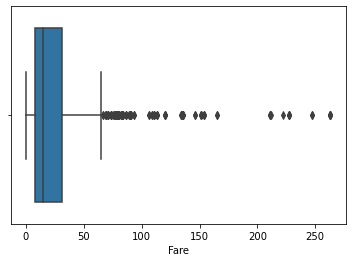

In [203]:
sns.boxplot(df_train["Fare"][df_train["Fare"]<500])

In [202]:
df_train["Fare"].quantile(0.75)

31.0

<AxesSubplot:xlabel='Fare', ylabel='Count'>

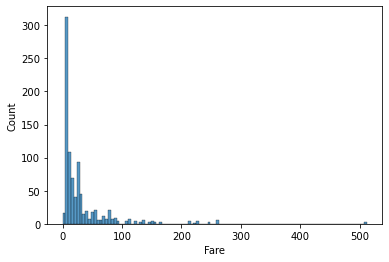

In [204]:
sns.histplot(df_train["Fare"])

In [205]:
df_train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [212]:
df_train["Fare"][df_train["Fare"]>100].value_counts().sum()

53

In [213]:
df_train["Fare"][df_train["Fare"]>100].value_counts()

263.0000    4
120.0000    4
227.5250    4
110.8833    4
151.5500    4
135.6333    3
211.3375    3
153.4625    3
512.3292    3
113.2750    3
108.9000    2
146.5208    2
164.8667    2
134.5000    2
133.6500    2
247.5208    2
106.4250    2
262.3750    2
211.5000    1
221.7792    1
Name: Fare, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

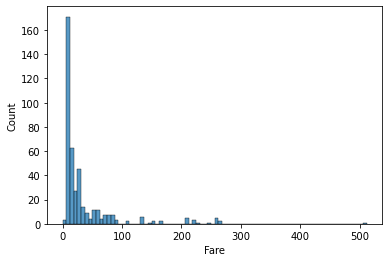

In [216]:
sns.histplot(df_test["Fare"])

In [218]:
df_test["Fare"][df_test["Fare"]>100].value_counts()

262.3750    5
211.5000    4
221.7792    3
134.5000    3
263.0000    2
151.5500    2
164.8667    2
136.7792    2
247.5208    1
227.5250    1
106.4250    1
135.6333    1
146.5208    1
211.3375    1
512.3292    1
108.9000    1
Name: Fare, dtype: int64